## Week 2, Part 1 Assignment: Graph Visualization
## CUNY MSDS DATA620 - Web Analytics
---
### Team5: Christopher Estevez, Meaghan Burke, Rickidon Singh,  Ritesh Lohiya, Rose Koh
### Video presentation: https://youtu.be/ys3cpAkpvXs
### 06/18/2018
---


In [1]:
import pandas as pd
import networkx as nx
import pylab as plt

## Google+ Social Circle Data

*source: https://snap.stanford.edu/data/egonets-Gplus.html*

### Descriptions of the files included gplus dataset

**nodeId.edges:** The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.

**nodeId.circles:** The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.

**nodeId.feat:** The features for each of the nodes that appears in the edge file.

**nodeId.egofeat:** The features for the ego user.

**nodeId.featnames:** The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data.

### Read in the gplus data 
-  The raw data file contains the unique combination of node connections for the above files. Source file: **gplus_combined.txt.gz**.*Edges from all egonets combined*
-  The code below extracts the gzip file and converts it to a pandas data frame.



In [2]:
initial_df = pd.read_table(r'data/gplus_combined.txt.gz', compression='gzip', \
                        sep=' ',header = None, error_bad_lines=False).drop_duplicates()

In [3]:
initial_df.rename(columns = {0 : 'Nodes_1', 1 : 'Nodes_2'}, inplace = True)
initial_df['Edges'] = range(1, len(initial_df) +1)
initial_df['Edges']= initial_df['Edges'].astype(str)

### Data Summary

In [4]:
initial_df.describe()

,Nodes_1,Nodes_2,Edges
count,13673453,13673453,13673453
unique,72271,107596,13673453
top,106228758905254036967,111091089527727420853,1699669
freq,5056,17055,1


### Filter for a Subset of Nodes:

-  Since the data is too large, the group decided to take a subset for the network analysis
-  Filtered the initial_df for the first 10 nodes under 'Nodes_1'

In [5]:
filter_node = pd.DataFrame(initial_df['Nodes_1'].unique()).head(10)
subset = initial_df.loc[initial_df['Nodes_1'].isin(filter_node[0])]
subset.describe()

,Nodes_1,Nodes_2,Edges
count,7412,7412,7412
unique,10,4302,7412
top,116407635616074189669,116805285176805120365,1491180
freq,1688,9,1


### Load the Data Into A Network Object:


- Object G will contain the subset network loaded from the .gz file
- Printing the network information reveals the nodes, edges, and degrees


In [6]:
G = nx.from_pandas_dataframe(subset , 'Nodes_1','Nodes_2', edge_attr = 'Edges')

In [7]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4302
Number of edges: 7403
Average degree:   3.4417


---

### Visualize The Network:

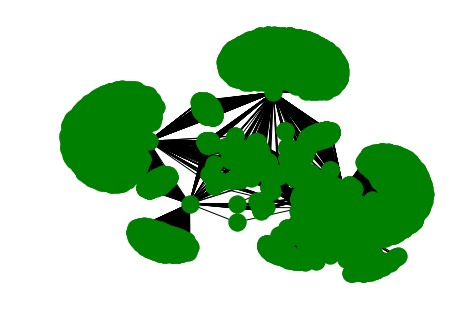

In [20]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
nx.draw(G, node_color = 'green') 
plt.show()

### Subset The Network:

**Two Subsets:**

1) After visualizing the network, a subset of the data is taken by first finding the neighbors from node '108683283643126638695' and using the subgraph function from networkx

2) Create small subgraph (first 150 nodes) just for graphing demo

In [9]:
nodes = G.neighbors('108683283643126638695')
sub_network = G.subgraph(nodes)
print(nx.info(sub_network))

Name: 
Type: Graph
Number of nodes: 281
Number of edges: 774
Average degree:   5.5089


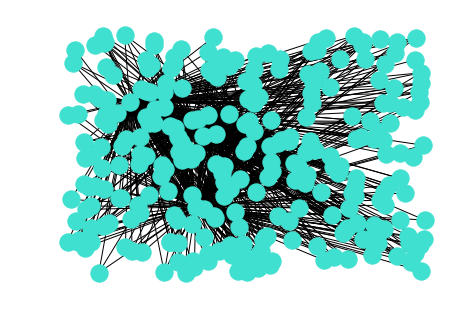

In [21]:
warnings.filterwarnings('ignore')
nx.draw_random(sub_network, node_color ='turquoise')

In [11]:
#Create small subgraph (first 150 nodes) just for graphing demo
sub_network_2 =G.subgraph(subset['Nodes_2'].unique().tolist()[:150])
print(nx.info(sub_network_2))

Name: 
Type: Graph
Number of nodes: 150
Number of edges: 54
Average degree:   0.7200


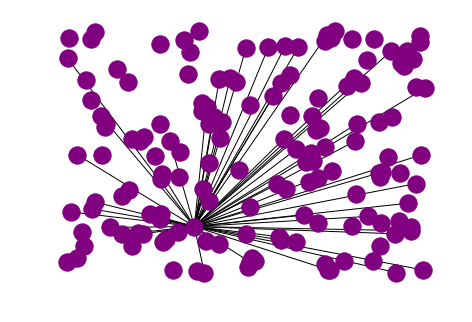

In [22]:
warnings.filterwarnings('ignore')
nx.draw_random(sub_network_2, node_color ='purple')

### Measures:

The measures chosen for this assignment are a diameter, Degree Centrality, Between Centrality, and cliques within this subnetwork.

#### Diameter
- The first measure is Diameter and is defined as the maximum eccentricity of any node in the graph, or greatest distance between any pair of nodes in the graph. The network G has a diameter of 5.

In [13]:
nx.diameter(G)

5

#### Degree:
- The node degree is the number of edges adjacent to that node

In [65]:
degree = G.degree()
df = pd.DataFrame([degree], columns=degree.keys())
df.rename(columns ={0:'Nodes'}, inplace = True)
df.sort_values(by=0, ascending=False, axis=1).T.head(10)

,0
116407635616074189669,1688
116374117927631468606,1472
105706178492556563330,1259
112188647432305746617,616
108736646334864181044,562
107527001343993112621,548
117421021456205115327,463
116719211656774388392,395
108683283643126638695,281
105513412023818293063,138


#### Degree Centrality:
- the fraction of nodes a node v is connected to

In [68]:
degree_centrality = nx.degree_centrality(G)
print("Degree_Centrality, Node")
sorted( ((v,k) for k,v in degree_centrality.items()), reverse=False)

Degree_Centrality, Node


[(0.00023250406882120437, '100000763912458474062'),
 (0.00023250406882120437, '100003761748305295041'),
 (0.00023250406882120437, '100021025784352405813'),
 (0.00023250406882120437, '100025536618853941891'),
 (0.00023250406882120437, '100029615420017681117'),
 (0.00023250406882120437, '100031852932201570050'),
 (0.00023250406882120437, '100041310890249910592'),
 (0.00023250406882120437, '100042105400303837110'),
 (0.00023250406882120437, '100043057758270223301'),
 (0.00023250406882120437, '100048100630151349283'),
 (0.00023250406882120437, '100057069861700562165'),
 (0.00023250406882120437, '100057204553955934520'),
 (0.00023250406882120437, '100062540864597103249'),
 (0.00023250406882120437, '100063318895469818177'),
 (0.00023250406882120437, '100070927167992422053'),
 (0.00023250406882120437, '100075356758919993129'),
 (0.00023250406882120437, '100080124053175377628'),
 (0.00023250406882120437, '100080670028138179312'),
 (0.00023250406882120437, '100081010984768669358'),
 (0.00023250

#### Between Centrality:
-  Between Centrality measures the extent to which a node lies on paths between other nodes. In other words which are the controllers of information in the network.

In [70]:
between_centrality = nx.betweenness_centrality(G)
print("BTW_Centrality, Node")
sorted( ((v,k) for k,v in between_centrality.items()), reverse=True)

BTW_Centrality, Node


[(0.4944773015480953, '116407635616074189669'),
 (0.4542774805416697, '116374117927631468606'),
 (0.40925600382884436, '105706178492556563330'),
 (0.11812028154438341, '117421021456205115327'),
 (0.05222537261589916, '107527001343993112621'),
 (0.036058262565884264, '112188647432305746617'),
 (0.029039565359882193, '108736646334864181044'),
 (0.02379701145628419, '116719211656774388392'),
 (0.006901338528915847, '113186623583029971455'),
 (0.005270068767137531, '116805285176805120365'),
 (0.0051678623843601735, '116113014152499702246'),
 (0.005075906290791393, '105513412023818293063'),
 (0.004600963474752299, '106734796011714755852'),
 (0.004317650667796633, '108683283643126638695'),
 (0.0037884753998187405, '107117483540235115863'),
 (0.0037884753998187405, '106189723444098348646'),
 (0.00340972827139132, '109590423597896078382'),
 (0.003027816073604353, '106526452034734966566'),
 (0.0029620712986995687, '107375322906605680039'),
 (0.002580159100912873, '116807883656585676940'),
 (0.0

#### Cliques:

- Groups of nodes with shared interest

In [71]:
list(nx.find_cliques(G))

[['100132815412082402248', '116374117927631468606'],
 ['108139015191701664219', '105706178492556563330'],
 ['105358402547726784850', '105706178492556563330'],
 ['102493891906301577447', '117421021456205115327', '116374117927631468606'],
 ['102221205611883843517', '116374117927631468606'],
 ['115062815716621078217', '105706178492556563330'],
 ['115588307990520146154', '105706178492556563330'],
 ['100892612779426154375', '105706178492556563330'],
 ['107028157462218372820', '105706178492556563330'],
 ['108285296632855004171', '116374117927631468606'],
 ['107626506696622378005', '116374117927631468606'],
 ['106245708073909716431', '105706178492556563330'],
 ['101785586318368575634', '116374117927631468606'],
 ['104045511944341391917', '105706178492556563330'],
 ['114619623685989006732', '116374117927631468606'],
 ['101851274707291135260', '117421021456205115327'],
 ['117075503202449801357', '105706178492556563330'],
 ['109610954243983229925', '116374117927631468606', '105706178492556563330

### Export for gephi

In [76]:
nx.write_gexf(G,'data/graph_visualization.gexf')